<a href="https://colab.research.google.com/github/Quan21046403/Ai/blob/main/Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


In [5]:
url='Advertising.csv'
data=pd.read_csv(url)
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


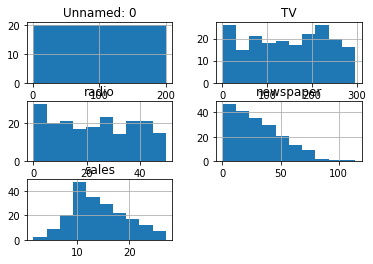

In [6]:
data.hist()
plt.show()

In [7]:
correlation = data.corr()
print(correlation)

            Unnamed: 0        TV     radio  newspaper     sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
radio        -0.110680  0.054809  1.000000   0.354104  0.576223
newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
sales        -0.051616  0.782224  0.576223   0.228299  1.000000


In [8]:
correlation = data.corr()
print(correlation)

            Unnamed: 0        TV     radio  newspaper     sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
radio        -0.110680  0.054809  1.000000   0.354104  0.576223
newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
sales        -0.051616  0.782224  0.576223   0.228299  1.000000


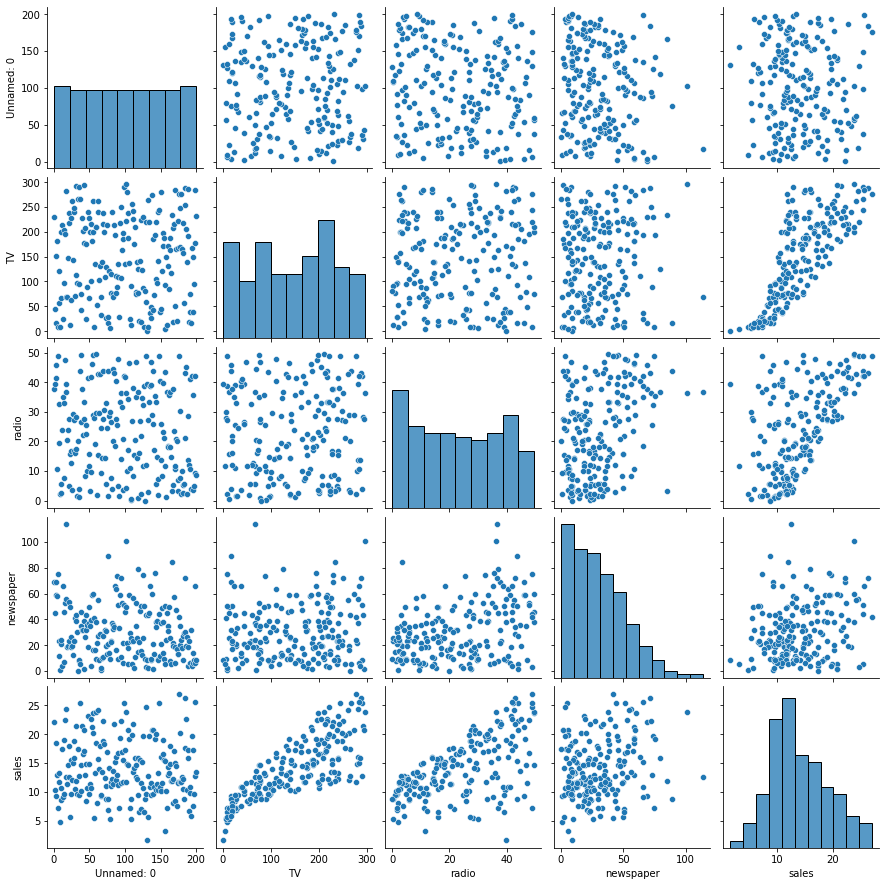

In [9]:
sns.pairplot(data)

<Axes: >

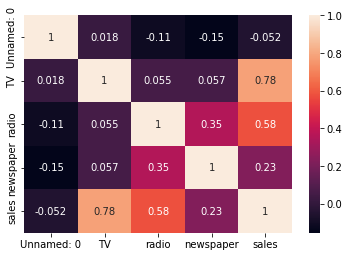

In [10]:
sns.heatmap(correlation,annot=True)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='sales', ylabel='TV'>

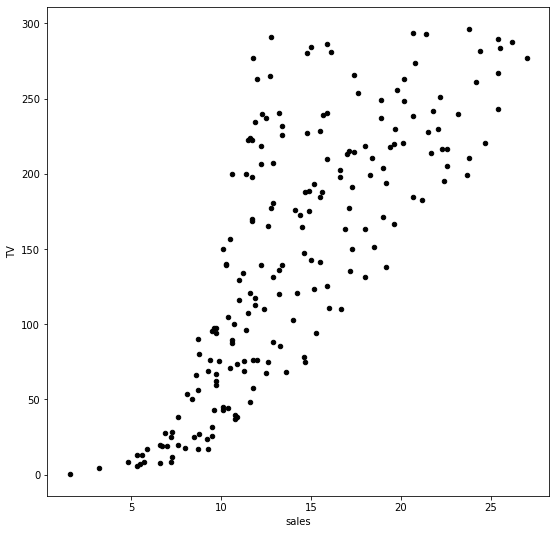

In [11]:
data.plot(kind='scatter',x='sales',y='TV',figsize=(9,9),color='black' )

In [12]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['sales']),y=data['TV'])
print('Giá trị Intercept là: ',model.intercept_)
print('Giá trị Coeffient là: ',model.coef_)

Giá trị Intercept là:  -33.45022776511354
Giá trị Coeffient là:  [12.87165112]


In [13]:
X=pd.DataFrame(data['sales'])
y=data['TV']
model.score(X,y) #Đánh giá độ chính xác: 61%

0.6118750508500711

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


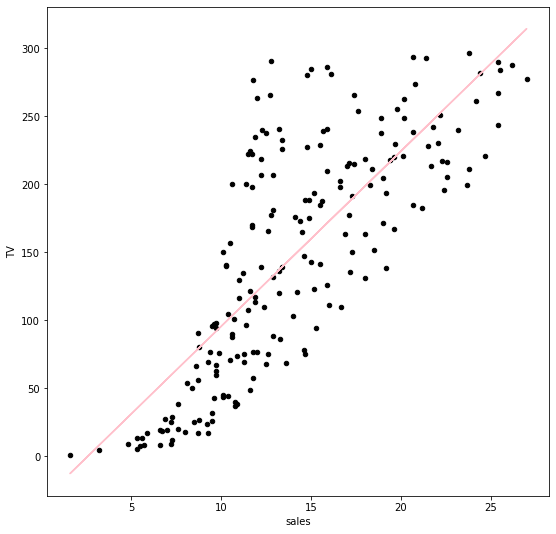

In [14]:
y_pred = model.predict(X)                 #y predict, Giá trị dự báo, hay y mũ
data.plot(kind='scatter',x='sales',y='TV',figsize=(9,9),color='black' )
plt.plot(data['sales'],y_pred, color='pink')    #Hồi quy bậc 1

In [15]:
#Hồi quy bậc 2
model = linear_model.LinearRegression()
X=pd.DataFrame([data['sales'],data['sales']**2]).T   #T: Transpose, chuyển vị
model.fit(X,y=data['TV'])
print("Hệ số Intercept: ",model.intercept_)
print("Hệ số coeffient là: ",model.coef_)
print("Độ chính xác của mô hình: ", model.score(X,y))  
#y=-0.49690844x^2 + 1,27.85355059.x -132.36742019420328
#Accuracy = 64.66%

Hệ số Intercept:  -132.36742019420328
Hệ số coeffient là:  [27.85355059 -0.49690844]
Độ chính xác của mô hình:  0.6466470605819978


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


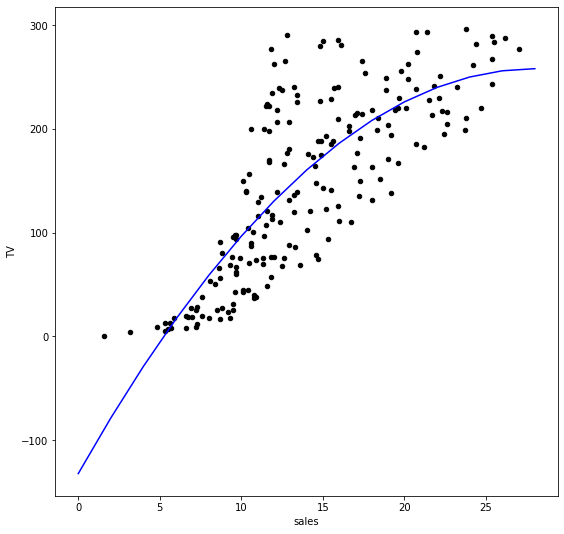

In [33]:
#Hồi quy bậc 2 Vẽ
import numpy as np
range = np.arange(0,30,2)
X_range = pd.DataFrame([range, range**2]).T
y_pred = model.predict(X_range)
data.plot(kind='scatter', x='sales', y='TV', figsize=(9,9), color ='black')
plt.plot(range, y_pred, color='blue')